In [1]:
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker as mtick

/Library/Python/2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


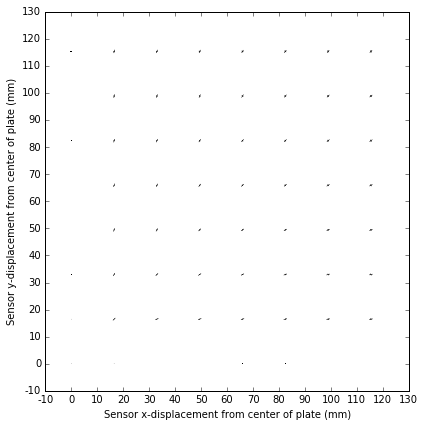

In [10]:
mm_per_grid = 16.4851752
steps_to_15 = 6000
radial_error = 2.00
total_mm = 15*mm_per_grid
x_coord = (np.dstack((np.arange(0, 15),)*15) - 7)[0]
y_coord = ((np.dstack((np.arange(0, 15),)*15) - 7).T)[:, :, 0]
angle = np.arctan2(y_coord, x_coord)
radii = np.sqrt(np.square(x_coord) + np.square(y_coord))

#
radial_error_x = np.ones(shape=(15,15))*np.sin(angle)*2 #In mm. 
radial_error_y = np.ones(shape=(15,15))*np.cos(angle)*2
angular_error_x = radial_error_y/2 * radii*0.009*mm_per_grid #in mm
angular_error_y = -radial_error_x/2 * radii*0.009*mm_per_grid

#Set the center error appropriately.
angular_error_x[7, 7] = -radial_error_y[7, 7]
radial_error_y[7, 7] = 0#radial_error_x[7, 7]

#Only visualize half the data for clarity.
radial_error_x = np.copy(radial_error_x[7:, 7:])
radial_error_y = np.copy(radial_error_y[7:, 7:])
angular_error_x = np.copy(angular_error_x[7:, 7:])
angular_error_y = np.copy(angular_error_y[7:, 7:])

quiver_scale = 1
#0.17 makes them touch 
value_scales = 0.17 * \
               0.133 # should scale them to be 0.133 the size of
                     # a grid spacing
fig, ax = plt.subplots(figsize=(6,6))

ax.quiver(value_scales*radial_error_x, value_scales*radial_error_y, 
          headaxislength=0, headlength=0.000001, pivot='mid', width=0.001,
          scale=quiver_scale, scale_units='inches')
ax.quiver(value_scales*angular_error_x, value_scales*angular_error_y, 
          headaxislength=0, headlength=0.000001, pivot='mid', width=0.001,
          scale=quiver_scale, scale_units='inches')

ax.quiver(-value_scales*radial_error_x, -value_scales*radial_error_y, 
          headaxislength=0, headlength=0.000001, pivot='mid', width=0.001,
          scale=quiver_scale, scale_units='inches')
ax.quiver(-value_scales*angular_error_x, -value_scales*angular_error_y, 
          headaxislength=0, headlength=0.000001, pivot='mid', width=0.001,
          scale=quiver_scale, scale_units='inches')

ax.set_xlabel("Sensor x-displacement from center of plate (mm)")
ax.set_ylabel("Sensor y-displacement from center of plate (mm)")

ax.xaxis.set_ticks(np.arange((0-10)/mm_per_grid,
                             135.1/mm_per_grid,
                             10./mm_per_grid))

ax.yaxis.set_ticks(np.arange((0-10)/mm_per_grid,
                             135.1/mm_per_grid,
                             10./mm_per_grid))
ax.get_xaxis().set_major_formatter(
    mtick.FuncFormatter(
    lambda x,i: '%.f' % (x*mm_per_grid)))#-7*mm_per_grid)))
ax.get_yaxis().set_major_formatter(
    mtick.FuncFormatter(
    lambda x,i: '%.f' % (x*mm_per_grid)))#-7*mm_per_grid)))

plt.tight_layout()
plt.savefig('positional_error_map.pdf')

In [12]:
np.sqrt(angular_error_x[7, 7]**2. + angular_error_y[7, 7]**2.)

1.4687541757940059

In [4]:
np.sqrt(2.)*110 * 0.009

1.4000714267493641